## Thư viện

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

import joblib

## Tải dữ liệu

In [15]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"

data = pd.read_csv(url)

print("Dữ liệu ban đầu")
display(data.head())

Dữ liệu ban đầu


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Tiền xử lý

In [16]:
data.dropna(inplace=True)

## Xử lý dữ liệu

### Category Encoding

In [17]:
data = pd.get_dummies(
    data,
    columns=["ocean_proximity"],
    drop_first=True
    )
print("Đã Encoding thành công")

Đã Encoding thành công


### Chia tập Data/Label

In [18]:
X = data.drop(columns=['median_house_value'])

y = data['median_house_value']
print("Đã chia tập dữ liệu Data/Label")

Đã chia tập dữ liệu Data/Label


### Chia tập huấn luyện

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # chia tập test 20%
    random_state=42
)
print("Đã chia tập train/test thành công (80/20)")

Đã chia tập train/test thành công (80/20)


## Huấn luyện mô hình

In [20]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

print("Đã huấn luyện thành công")

Đã huấn luyện thành công


## Đánh giá mô hình

### Các chỉ số đánh giá

In [26]:
def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)

  # Sai số trung bình tuyệt đối
  mae = mean_absolute_error(y_test, y_pred)

  # Sai số bình phương trung bình
  mse = mean_squared_error(y_test, y_pred)

  # Sai số phần trăm trung bình tuyệt đối
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

  # Độ chính xác theo R2
  r2 = r2_score(y_test, y_pred)

  print(f"{model.__class__.__name__}:")
  print(f"  - MAE: {mae}")
  print(f"  - MSE: {mse}")
  print(f"  - R² Score: {r2:.4f}")
  print(f"  - MAPE: {mape:.2f}%")  # Tính sai số phần trăm


evaluate_model(lr_model, X_test, y_test)

LinearRegression:
  - MAE: 50413.4333081006
  - MSE: 4802173538.60416
  - R² Score: 0.6488
  - MAPE: 28.60%


### Trực quan hóa kết quả

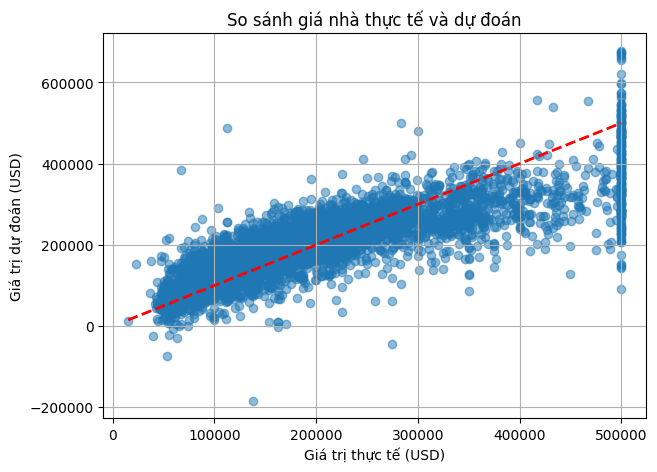

In [27]:
# Vẽ scatter plot thực tế vs dự đoán

# Tính y dự đoán
y_pred = lr_model.predict(X_test)

# Vẽ biểu đồ

# Vẽ biểu đồ phân bố y_test - y_pred
plt.figure(figsize = (7, 5))
plt.scatter(
    y_test,      # giá trị trục x - giá trị thực
    y_pred,      # giá trị trục y - giá trị dự đoán
    alpha = 0.5  # độ mờ
)

# Vẽ đường chéo 45 độ
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    lw = 2
)

# Thêm thông tin cho biểu đồ
plt.xlabel("Giá trị thực tế (USD)")
plt.ylabel("Giá trị dự đoán (USD)")
plt.title("So sánh giá nhà thực tế và dự đoán")

plt.grid(True)
plt.show()

## Deploy cơ bản

In [28]:
# Lưu mô hình Linear Regression đã train
joblib.dump(lr_model, "house_price_model.pkl")
print("Mô hình đã được lưu")

Mô hình đã được lưu


### Tải thư viện

In [29]:
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.3 MB/s eta 0:00:00


### Thiết kế giao diện

In [30]:
# Viết APP Streamlit
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Tải mô hình
model = joblib.load("house_price_model.pkl")

# Tiêu đề ứng dụng
st.title("🏡 Dự đoán giá nhà với Machine Learning")

# Tạo form nhập dữ liệu
st.sidebar.header("Nhập thông tin căn nhà")

def user_input_features():
    longitude = st.sidebar.number_input("Longitude", value=-118.25)
    latitude = st.sidebar.number_input("Latitude", value=34.05)
    housing_median_age = st.sidebar.number_input("Housing Median Age", value=30)
    total_rooms = st.sidebar.number_input("Total Rooms", value=5000)
    total_bedrooms = st.sidebar.number_input("Total Bedrooms", value=1000)
    population = st.sidebar.number_input("Population", value=1500)
    households = st.sidebar.number_input("Households", value=500)
    median_income = st.sidebar.number_input("Median Income", value=3.5)

    # One-hot encoding cho 'ocean_proximity'
    ocean_proximity_inland = st.sidebar.checkbox("Inland", value=False)
    ocean_proximity_island = st.sidebar.checkbox("Island", value=False)
    ocean_proximity_near_bay = st.sidebar.checkbox("Near Bay", value=False)
    ocean_proximity_near_ocean = st.sidebar.checkbox("Near Ocean", value=False)

    data = {
        "longitude": longitude,
        "latitude": latitude,
        "housing_median_age": housing_median_age,
        "total_rooms": total_rooms,
        "total_bedrooms": total_bedrooms,
        "population": population,
        "households": households,
        "median_income": median_income,
        "ocean_proximity_INLAND": int(ocean_proximity_inland),
        "ocean_proximity_ISLAND": int(ocean_proximity_island),
        "ocean_proximity_NEAR BAY": int(ocean_proximity_near_bay),
        "ocean_proximity_NEAR OCEAN": int(ocean_proximity_near_ocean),
    }

    return pd.DataFrame(data, index=[0])

# Lấy dữ liệu từ form
input_df = user_input_features()

# Dự đoán giá nhà
if st.button("Dự đoán giá nhà 💰"):
    prediction = model.predict(input_df)
    st.subheader(f"📢 Giá nhà dự đoán: ${prediction[0]:,.2f}")

Writing app.py


### Chạy App

In [31]:
from pyngrok import ngrok
ngrok.set_auth_token("363wbuUxX2hWy1MEihAXrIQAbZZ_4FPNqJx4AhC4yVzjRWRgD")
public_url = ngrok.connect(8501)
print(f"🌐 App đang chạy tại: {public_url}")

# Chạy streamlit
!streamlit run app.py

🌐 App đang chạy tại: NgrokTunnel: "https://nonevanescent-unsafe-angelena.ngrok-free.dev" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.231.32:8501

  Stopping...
  Stopping...
